In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#2): Which is digit '4'


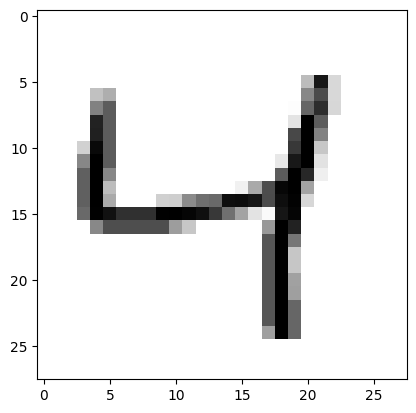

In [5]:
digit = 2
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

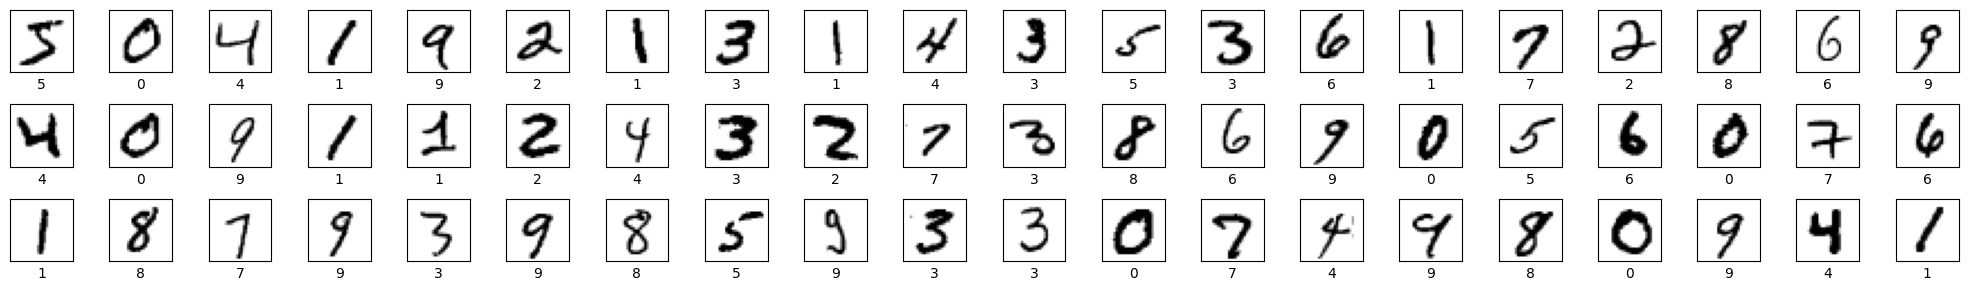

In [6]:
ROWS = 3
COLS = 20
i = 0
plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [7]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#2): Which is digit '4'


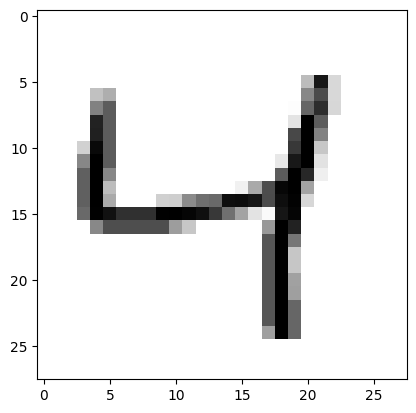

In [8]:
digit = 2
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [23]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8521 - loss: 0.5097 - val_accuracy: 0.9502 - val_loss: 0.1624
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9643 - loss: 0.1166 - val_accuracy: 0.9646 - val_loss: 0.1202
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9783 - loss: 0.0705 - val_accuracy: 0.9692 - val_loss: 0.1081
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9650 - val_loss: 0.1248
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9870 - loss: 0.0380 - val_accuracy: 0.9701 - val_loss: 0.1095
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9907 - loss: 0.0274 - val_accuracy: 0.9678 - val_loss: 0.1250
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9724 - val_loss: 0.1108
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9930 - loss: 0.0204 - val_accuracy: 0.

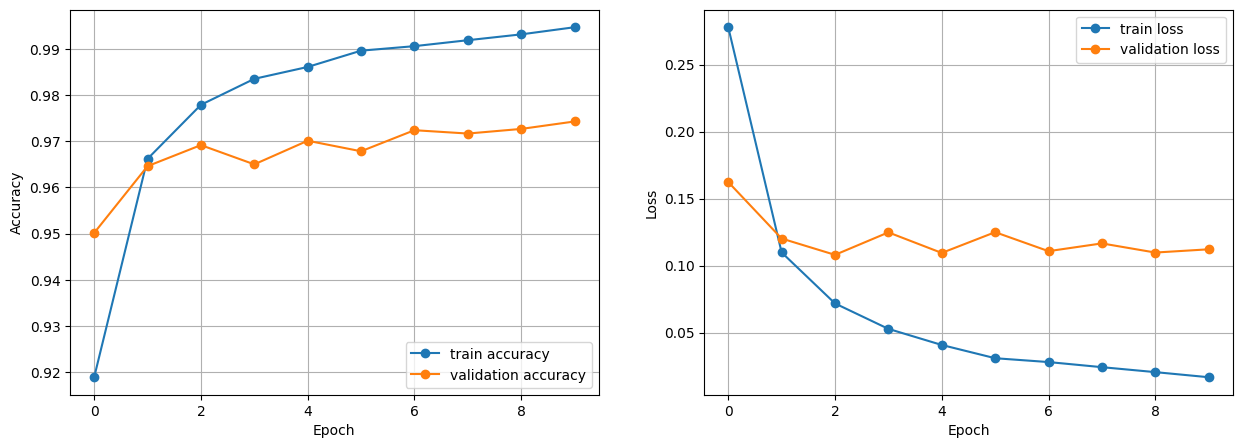

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.1111

Test accuracy: 0.9751999974250793


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


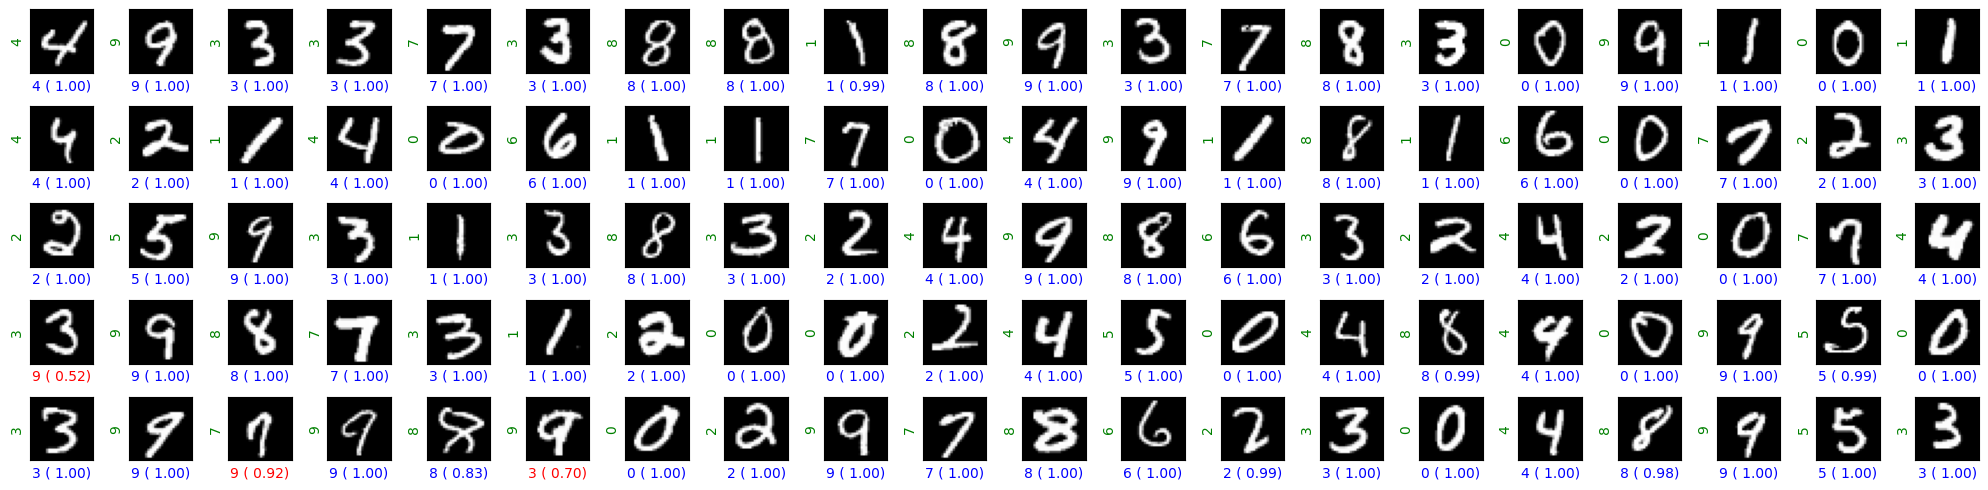

In [14]:
predictions = model.predict(x_test)
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

In [21]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


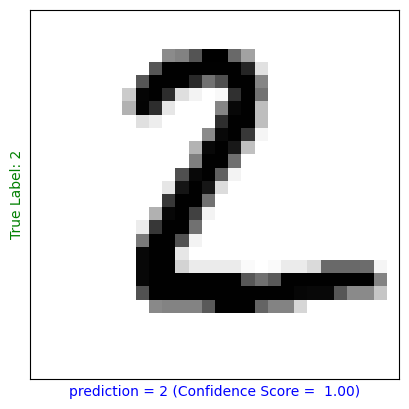

In [22]:
test(1)

In [19]:
model.save("my_model.h5")

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
MODEL_PATH = "my_model.h5"  
model = load_model(MODEL_PATH)

In [3]:
def prepare_digit(image):
    """Preprocess ROI from webcam for digit recognition (MNIST style)."""
    # Convert to grayscale + blur to reduce noise
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)

    # Adaptive thresholding (invert colors: digit = white)
    binary = cv2.adaptiveThreshold(
        blurred, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 3
    )

    # Reduce noise and emphasize strokes
    binary = cv2.medianBlur(binary, 3)
    binary = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=1)

    # Find digit contour
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Biggest contour = digit
        main_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(main_contour)

        # Create square canvas around digit
        side = max(w, h)
        dx = (side - w) // 2
        dy = (side - h) // 2

        square_digit = np.zeros((side, side), dtype=np.uint8)
        square_digit[dy:dy + h, dx:dx + w] = binary[y:y + h, x:x + w]

        # Resize to 20×20 and place in 28×28 (padding = 4 px)
        resized = cv2.resize(square_digit, (20, 20))
        canvas = np.zeros((28, 28), dtype=np.uint8)
        canvas[4:24, 4:24] = resized
    else:
        # Fallback: just resize full ROI
        canvas = cv2.resize(binary, (28, 28))

    # Normalize and reshape for model input
    normalized = canvas.astype("float32") / 255.0
    normalized = normalized.reshape(1, 784)  # (1,784) for fully-connected MNIST

    return normalized, canvas


In [4]:
def run_webcam_prediction(model):
    cam = cv2.VideoCapture(0)
    if not cam.isOpened():
        print("❌ Webcam not available")
        return

    print("✅ Webcam active! Draw a digit inside the green box. Press 'q' to quit.")

    while True:
        grabbed, frame = cam.read()
        if not grabbed:
            break

        height, width = frame.shape[:2]
        box_size = 150
        x_start = (width - box_size) // 2
        y_start = (height - box_size) // 2
        x_end, y_end = x_start + box_size, y_start + box_size

        # Draw ROI guide box
        output_frame = frame.copy()
        cv2.rectangle(output_frame, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)

        # Process ROI
        roi = frame[y_start:y_end, x_start:x_end]
        processed_input, debug_view = prepare_digit(roi)
        preds = model.predict(processed_input, verbose=0)
        pred_digit = np.argmax(preds)
        pred_conf = np.max(preds)

        # --- New Output Style ---
        # Black banner at bottom
        cv2.rectangle(output_frame, (0, height - 60), (width, height), (0, 0, 0), -1)

        # Display prediction
        cv2.putText(output_frame, f"Digit: {pred_digit}", (20, height - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 255), 3)   # Yellow
        cv2.putText(output_frame, f"Confidence: {pred_conf:.2f}", (200, height - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2) # White

        # Place CNN view in bottom-right
        preview = cv2.resize(debug_view, (120, 120))
        preview = cv2.cvtColor(preview, cv2.COLOR_GRAY2BGR)
        output_frame[height-130:height-10, width-130:width-10] = preview
        cv2.putText(output_frame, "Model Input", (width-150, height-140),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        # Show final window
        cv2.imshow("Digit Recognition (Webcam)", output_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cam.release()
    cv2.destroyAllWindows()


In [5]:
import tensorflow as tf

if __name__ == "__main__":
    # Load your trained MNIST model
    model = tf.keras.models.load_model("my_model.h5")

    # Pass the model into the function
    run_webcam_prediction(model)


✅ Webcam active! Draw a digit inside the green box. Press 'q' to quit.
